In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.__version__

'2.2.0'

In [24]:
from tensorflow.keras.datasets import mnist

In [25]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
print("Training set: ", X_train.shape,"\nTesting Set: ", X_test.shape)

Training set:  (60000, 28, 28) 
Testing Set:  (10000, 28, 28)


In [26]:
# Making values range from 0 to 1
X_train = X_train / 255.0
X_test = X_test / 255.0

# Every picture has a 3rd dimention of 1 
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

# Declaring input shape
model_input_shape = X_train[0].shape

In [34]:
model = Sequential([
    Conv2D(32, 3, padding='same', activation='relu', input_shape = model_input_shape),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation= 'softmax')
])

In [35]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               1605760   
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)              

In [36]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics='accuracy')
history = model.fit(X_train, Y_train, batch_size = 128, epochs = 10, verbose = 1, validation_data=(X_test, Y_test))

Epoch 1/10
469/469 [==============================] - 130s 277ms/step - loss: 0.2360 - accuracy: 0.9267 - val_loss: 0.0525 - val_accuracy: 0.9831
Epoch 2/10
469/469 [==============================] - 138s 294ms/step - loss: 0.0848 - accuracy: 0.9751 - val_loss: 0.0377 - val_accuracy: 0.9868
Epoch 3/10
469/469 [==============================] - 137s 293ms/step - loss: 0.0667 - accuracy: 0.9800 - val_loss: 0.0348 - val_accuracy: 0.9885
Epoch 4/10
469/469 [==============================] - 128s 273ms/step - loss: 0.0526 - accuracy: 0.9837 - val_loss: 0.0345 - val_accuracy: 0.9877
Epoch 5/10
469/469 [==============================] - 129s 275ms/step - loss: 0.0464 - accuracy: 0.9851 - val_loss: 0.0314 - val_accuracy: 0.9904
Epoch 6/10
469/469 [==============================] - 120s 256ms/step - loss: 0.0396 - accuracy: 0.9873 - val_loss: 0.0318 - val_accuracy: 0.9895
Epoch 7/10
469/469 [==============================] - 131s 280ms/step - loss: 0.0347 - accuracy: 0.9890 - val_loss: 0.0263 -

In [37]:
!mkdir -p saved_model
model.save('saved_model/my_model') 

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: saved_model/my_model\assets


In [40]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 6s 18ms/step - loss: 0.0302 - accuracy: 0.9913


[0.030185312032699585, 0.9912999868392944]

In [44]:
def plot_learningCurve(history, epochs):
    epoch_range = range(1, epochs+1)
    plt.plot(epoch_range, history['accuracy'])
    plt.plot(epoch_range, history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train','Val'],loc='upper left')
    plt.show()
    
    plt.plot(epoch_range, history['loss'])
    plt.plot(epoch_range, history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train','Val'],loc='upper left')
    plt.show()

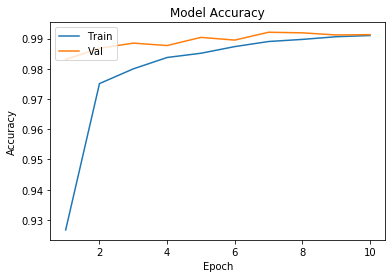

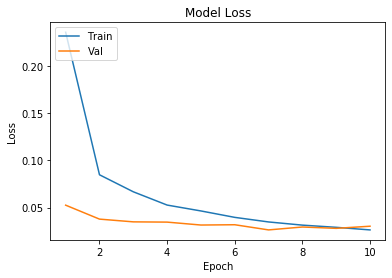

In [46]:
plot_learningCurve(history.history, 10)